# Unsupervised Classification

#### import all req lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('live.csv')

In [3]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns ={'Column1','Column2','Column3','Column4'}) 

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [6]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], shape=(6997,), dtype=object)

In [7]:
len(df['status_id'].unique())


6997

In [8]:
len(df['status_type'].unique())

4

In [9]:
len(df['status_published'].unique())

6913

In [10]:
len(df['status_published'].unique())

6913

In [11]:
df = df.drop(columns={'status_id','status_published'})

In [12]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


## declare feature vector and target variable


In [13]:
x = df
y = df['status_type']

## convert categorical variable into integers

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x['status_type'] = le.fit_transform(x['status_type'])

y = le.transform(y)

#### 

In [18]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


array([3, 1, 3, ..., 1, 1, 1], shape=(7050,))

## Feature scaling

In [20]:
cols = x.columns
cols

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

x = ms.fit_transform(x)
x

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(7050, 10))

In [22]:
x = pd.DataFrame(x, columns=[cols])

In [23]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


# K - Means model with two clusters

#### The algorithm works as follows:  

#### Initialization: We begin by randomly selecting k cluster centroids.
#### Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.
#### Update Step: After the assignment, we recalculate the centroid of each cluster by averaging the points within it.
#### Repeat: This process repeats until the centroids no longer change or the maximum number of iterations is reached.

##### random_state=0: This parameter ensures that the random initialization of the cluster centroids is the same each time you run the code. This makes the results reproducible. Without it, the algorithm might start with different random centroids, potentially leading to slightly different cluster assignments each time.


In [34]:
from sklearn.cluster import KMeans

KMeans = KMeans(n_clusters=3, random_state=0)

KMeans.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [35]:
KMeans.inertia_

178.66340039279422

# check quality of weak classification by the model

##### labels = KMeans.labels_: This retrieves the cluster assignments for each data point from the fitted KMeans model. The model assigns an integer label (e.g., 0, 1) to each data point based on which of the two clusters it belongs to. correct_labels = sum(y == labels): This is the problematic part. It is comparing the raw cluster labels (labels) to your original target labels (y). This will only count the instances where the K-Means label happens to coincidentally match the true label. The numerical value of the label assigned by K-Means (0 or 1) is arbitrary. The model might assign 0 to what you know is the true class 1, and 1 to what you know is the true class 0.

In [36]:
labels = KMeans.labels_

#check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y.size))

Result: 4066 out of 7050 samples were correctly labeled.


In [37]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58


# use elbow method to find optimal number of solution

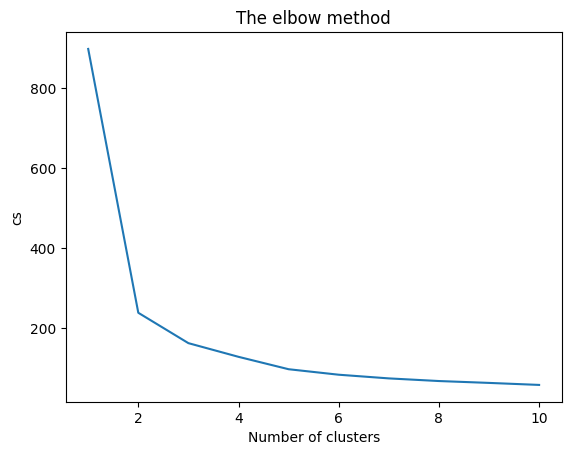

In [93]:
from sklearn.cluster import KMeans
cs = []

for i in range (1, 11):
    kMeans= KMeans(n_clusters= i, init = 'k-means++',max_iter=300, n_init=10, random_state=0)
    kMeans.fit(x)
    cs.append(kMeans.inertia_)

plt.plot(range(1,11), cs)
plt.xlabel('Number of clusters')
plt.ylabel('cs')
plt.title('The elbow method')
plt.show()